# Tour dos pacotes científicos principais

Existem três pacotes campeões na área científica.

* `numpy`, para computação numérica, possui *arrays* que são muito mais rápidos que listas em Python, e uma série de funções para manipular esses *arrays*. [docs](https://numpy.org/doc/stable/) e [livro recomendado](http://web.mit.edu/dvp/Public/numpybook.pdf)
* `pandas`, para o carregamento, processamento, limpeza, filtragem, agregação e exportação de dados. [docs](https://pandas.pydata.org/pandas-docs/stable/index.html)
* `matplotlib`, para a criação de gráficos. [docs](https://matplotlib.org/)
* `scipy`, com funções específicas para a área científica. [docs](https://docs.scipy.org/doc/scipy/index.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Cada um desses pacotes são um universo e nunca conseguirei fazer juz à todos, especialmente em um único capítulo. Eu começarei descrevendo cada um aos poucos, depois começarei a juntar as peças e por fim tentarei mostrar problemas mais completos.

(sec:basicos_np_1)=
## Básicos de `numpy` Parte 1

[Veja também a seção para iniciantes da documentação](https://numpy.org/doc/stable/user/absolute_beginners.html)

Listas em Python podem conter qualquer objetos de tipo. Números, strings, objetos complexos, qualquer coisa, de qualquer tamanho. Para isso, o interpretador precisa de uma série de abstrações que permitam essa flexibilidade, e isso traz lentidão. No centro de `numpy` temos os *arrays* como análogos a listas, mas:

* *arrays* precisam ser somente de um mesmo tipo, e esses tipos nem sempre são idênticos ao existentes em Python.
* *arrays* precisam de um tamanho fixo.

Essa rigidez traz algumas vantagens

* Flexibilidade no formato: *arrays* possuem um *buffer*, um bloco contíguo de memória, contendo informação (bytes), e uma descrição desses dados, como o número de linhas, colunas, tipo do dado. Assim, `numpy` consegue acessar qualquer elemento com muita rapidez, com um simples cálculo de posição. Além disso, quando queremos transformar um *array*, com uma transposta ou uma alteração no número de linhas ou colunas, não precisamos alterar esse bloco de memória, somente os cálculos para encontrar os elementos.
* Expressividade: operações em todos os elementos, algo muito comum, podem ser feitas como se um *array* fosse um escalar qualquer, sem termos que nos preocupar com loops ao longo dos elementos.
* Vetorização: quando aplicamos operações em *arrays*, o processamento é transferido para a linguagem C, onde a velocidade de execução é mais rápida.

Logo, utilizar *arrays* nos permite ter código rápido e expressivo. 

### Declaração

Para criar um *array*, podemos utilizar a função `np.array` com um iterável.

In [2]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

Podemos também utilizar várias funções que geram *arrays*, como:

* `np.arange`, que é similar ao embutido `range`, mas onde podemos ter passos não inteiros

In [3]:
print(np.arange(10), np.arange(1, 10, 1), np.arange(2, 10, 0.375), sep="\n")

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[2.    2.375 2.75  3.125 3.5   3.875 4.25  4.625 5.    5.375 5.75  6.125
 6.5   6.875 7.25  7.625 8.    8.375 8.75  9.125 9.5   9.875]


* `np.linspace`, que recebe um valor de início, fim e um número de pontos e retorna um *array* onde esses pontos são espaçados igualmente na escala linear. Importante realçar que neste caso o ponto final é incluído por padrão (*kwarg* `endpoint`). Logo, nestes exemplos o número de pontos pode *parecer* errado, m se você contá-los na mão verá todos tem o tamanho correto.

In [4]:
print(np.linspace(1, 10, num=10), np.linspace(1, 10, num=19), np.linspace(50, 100, num=6))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ] [ 50.  60.  70.  80.  90. 100.]


* `np.logspace`, que é similar a `np.linspace`, mas os dados são espaçados igualmente na escala log. Por padrão a base é 10, mas pode ser especificada com o *kwarg* `base`. Os valores fornecidos são a *potência* em que a base é elevada, então se quiser começar de 10, o valor de `start` é 1.

In [5]:
print(np.logspace(0, 3, num=4), np.logspace(-3, 3, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.geomspace` é similar a `np.logspace`, mas os pontos iniciais e finais são fornecidos diretamente, sem precisar colocar a base e expoente.

In [6]:
print(np.geomspace(1, 1000, num=4), np.geomspace(1e-3, 1000, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.ones`, que gera uma *array* contendo somente uns do tamanho especificado.

In [7]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

* `np.zeros` faz o mesmo, mas contendo somente zeros

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* `np.ones_like` e `np.zeros_like` retornam *arrays* cheias de zeros ou uns com o mesmo formato de outra array

In [9]:
temp = np.array([1, 2, 3, 4, 5])
print(np.ones_like(temp), np.zeros_like(temp))

[1 1 1 1 1] [0 0 0 0 0]


Até agora todas as estruturas mostradas são 0-dimensionais. Não são como vetores linha ou coluna, são só sequências. Isso pode ser acessado pela propriedade `.shape`. A propriedade `.size` contém o número total de elementos.

In [10]:
print(temp.shape, temp.size)

(5,) 5


### Tipos

Na hora de criar *arrays*, um tipo pode ser especificado com o argumento `dtype`, comum em muitas funções para criação de *arrays*. Os tipos que são aceitos são diferentes de Python. Para ilustrar isso, vamos ver como ele se comporta ao tentarmos criar uma *array* com um número inteiro grande demais. 

Em Python, `int` são possui limite de tamanho. Cresce e diminui de maneira a atender as necessidades vigentes. Porém, em linguagens de programação um `int` tem um tamanho fixo, geralmente 32 ou 64 bits. Para um número inteiro de 32 bits, temos 2^32 valores diferentes. Em `numpy`, temos os tipos `np.int32` que representa um número inteiro de 32 bits com sinal e `np.uint32` que representa um número inteiro sem sinal. O valor máximo de `np.int32` é 2147483647 ($2^31 - 1$, lembre-se que 0 também conta) e o valor mínimo é, previsivelmente, -2147483647. O valor máximo de `np.uint32` é 4294967295 e o mínimo é 0. Se aumentarmos o número para 64 bits, temos 2^64 valores, uma quantidade estupendamente maior.

Veja os seguintes exemplos. Primeiro mostro como podemos criar um *array* com esse valor máximo em `np.int32`, `np.int64` e `np.uint32`. Mas se tento criar um *array* com um número acima do máximo, temos um `OverflowError`.

In [11]:
int32_max = 2147483647
print(np.array([int32_max], dtype=np.int32))
print(np.array([int32_max], dtype=np.int64))
print(np.array([int32_max], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int64))
print(np.array([int32_max + 1], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int32))

[2147483647]
[2147483647]
[2147483647]
[2147483648]
[2147483648]


OverflowError: Python int too large to convert to C long

Aqui, *overflow* significa que os bits para a criação passaram do comprimento reservado. Para ilustrar isso, vamos imaginar um byte, com 8 bits, em seu valor máximo, `0b1111_1111`. Se adicionarmos 1, atingimos `0b1_0000_0000`, mas como temos somente 8 bits de armazenamento, esse `1` à esquerda é perdido e resta somente `0` (ocorreu *overflow*)[^5]

[^5]: O mesmo pode ocorrer no outro sentido, com números com sinal, mas neste caso é chamado de *underflow*

Podemos isso ocorrendo diretamente neste exemplo. Ao invés de criar o *array* com o *overflow*, podemos criar e depois causar o *overflow* sem causar o erro.

In [12]:
print(
    np.array([2147483647], dtype=np.int32) + 1,
    np.array([4294967295], dtype=np.uint32) + 1,
)

[-2147483648] [0]


Podemos converter um array de um tipo para outro com o método `.astype`

In [13]:
arr_int = np.array([1, 2, 3])
print(arr_int, arr_int.astype(np.float64))

[1 2 3] [1. 2. 3.]


Quando um *array* é criado a partir de uma lista com elementos mistos, `numpy` tenta converter todos os valores para o tipo mais abrangente.

In [14]:
np.array([1, 1.1])

array([1. , 1.1])

`1` foi convertido em um `float`.

In [15]:
np.array([1, 1.1, "2.2"])

array(['1', '1.1', '2.2'], dtype='<U32')

`1` e `1.1` foram convertidos em strings.

### `arrays` multidimensionais

Podemos criar *arrays* multidimensionais com várias das funções anteriores. Aqui, `np.array` interpreta listas aninhadas como sendo multidimensionais, e `np.ones` ou `np.zeros` aceita um argumento com as dimensões da nova `array`.

In [16]:
print(
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([[1], [2], [3], [4], [5], [6]]),
    np.ones((2, 3)),
    np.zeros((3, 2)),
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0.]
 [0. 0.]
 [0. 0.]]


`np.ones_like`, `np.zeros_like` permite que uma *array* cheia de zeros ou uns com o mesmo formato de outra *array* seja criada.

In [17]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ones_like(arr_2d), "\n\n", np.zeros_like(arr_2d))

[[1 1 1]
 [1 1 1]] 

 [[0 0 0]
 [0 0 0]]


### Modificação de forma

E podemos alterar as dimensões de *arrays* com `reshape` e o número de linhas e colunas, desde que os números de elementos sejam compatíveis.

In [18]:
arr_0d = np.arange(1, 7, 1)
arr_1d_lin = arr_0d.reshape(1, 6)
arr_1d_col = arr_0d.reshape(6, 1)
arr_2d = arr_0d.reshape(2, 3)
arr_3d = arr_0d.reshape(1, 3, 2)
print(
    arr_0d,
    arr_0d.shape,
    arr_0d.size,
    "\n\n",
    arr_1d_lin,
    arr_1d_lin.shape,
    arr_1d_lin.size,
    "\n\n",
    arr_1d_col,
    arr_1d_col.shape,
    arr_1d_col.size,
    "\n\n",
    arr_2d,
    arr_2d.shape,
    arr_2d.size,
    "\n\n",
    arr_3d,
    arr_3d.shape,
    arr_3d.size,
)

[1 2 3 4 5 6] (6,) 6 

 [[1 2 3 4 5 6]] (1, 6) 6 

 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1) 6 

 [[1 2 3]
 [4 5 6]] (2, 3) 6 

 [[[1 2]
  [3 4]
  [5 6]]] (1, 3, 2) 6


Por praticidade, uma dimensão pode ser especificada como `-1`, deixando que seu valor seja calculado pelos outros valores.

In [19]:
arr_0d.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

Se quisermos acessar um elemento, podemos fazer com a notação de colchetes. Convenientemente, ao invés de termos que encadear colchetes, podemos fornecer o índice, ou slices, separados por vírgula.

In [20]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1],  # segundo linha, segunda coluna
    loc[:, 0],  # "todas as linhas, primeira coluna"
    loc[1, :],  # "segunda linha, todas as colunas"
    loc[1:4, 1:4],  # "segunda linha até a próxima, segunda coluna até a próxima"
    loc[::2, ::2],  # "todas linhas de 2 em duas, todas as colunas de 2 em duas"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

5

[1 4 7]

[4 5 6]

[[5 6]
 [8 9]]

[[1 3]
 [7 9]]


Note que nessas operações, as dimensões dos *arrays* obtidos variam. Se especificamos um único índice, temos um número. Se especificamos uma linha ou coluna, temos *arrays* 0d, e somente se especificarmos algo que precisa ser 2d que teremos resultados 2d. Podemos utilizar `np.newaxis` na posição do eixo que desejamos adicionar, para alterar esse comportamento.

In [21]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1, np.newaxis],  # segundo linha, segunda coluna, criando um eixo
    loc[np.newaxis, :, 0],  # "todas as linhas, primeira coluna, com dimensão no eixo 0 (linhas)"
    loc[1, :, np.newaxis],  # "segunda linha, todas as colunas, com dimensão extra no eixo 2 (decai para colunas)"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[5]

[[1 4 7]]

[[4]
 [5]
 [6]]


Para alterar o valor de um elemento, podemos utilizar a notação já esperada de `arr[idx] = val`. Nos índices podemos colocar slices também para transformarmos mais de uma posição de cada vez. O número de elementos precisa ser apropriado, senão um `ValueError` será lançado.

In [22]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(loc, "\n\n")
loc[1, 2] = 100
print(loc, "\n\n")
loc[:, 0] = (-1, -2, -3)
print(loc)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 


[[  1   2   3]
 [  4   5 100]
 [  7   8   9]] 


[[ -1   2   3]
 [ -2   5 100]
 [ -3   8   9]]


### Transposição

Também podemos transpor uma matriz com `.T`. Note que isto não é uma função, não altera a matriz. A função `numpy.transpose` também realiza essa tarefa.

In [23]:
transp = np.ones((2, 3))
print(transp)
print()
print(transp.T)
print()
print(np.transpose(transp))

[[1. 1. 1.]
 [1. 1. 1.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]]


Porém, um `array` de dimensão 0 não sofre alteração se for transposto. É necessário adicionar uma dimensão para isso.

In [24]:
transp_0d = np.arange(3)
print(transp_0d)
print()
print(transp_0d.T)
print()
print(transp_0d[np.newaxis, :].T)

[0 1 2]

[0 1 2]

[[0]
 [1]
 [2]]


### Remoção de dimensões

De vez em quando queremos que uma matriz ou vetor seja planificado. Ao invés de nos preocuparmos com `reshape`, podemos utilizar o método `.flatten` ou a função `np.ravel`.

In [25]:
rand = np.random.random((3, 3))
print(rand)
print()
print(rand.flatten())
print()
print(np.ravel(rand))

[[0.78065207 0.62163021 0.08939036]
 [0.3552677  0.19512262 0.01264086]
 [0.90385654 0.68287153 0.97200195]]

[0.78065207 0.62163021 0.08939036 0.3552677  0.19512262 0.01264086
 0.90385654 0.68287153 0.97200195]

[0.78065207 0.62163021 0.08939036 0.3552677  0.19512262 0.01264086
 0.90385654 0.68287153 0.97200195]


Aqui, utilizei a função do submódulo `random` para gerar uma matriz com valores aleatórios entre 0 e 1. Iremos explorar mais funções desse pacote depois. A diferença de `.flatten` e `np.ravel` é a seguinte: A primeira retorna uma **cópia**, e a segunda retorna uma **visão** do *array*.

### Cópias e visão (*views*)

Em uma cópia, alterações feitas no *array* não afetam o objeto original, mas em visões, isso pode ocorrer. 

No seccionamento, são retornadas visões. Se quisermos uma cópia, podemos utilizar `.copy`.

In [26]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
view1 = loc[1:, 1:]
print(loc, "\n\n", view1, "\n\n")

loc[2, 2] = 100
print(loc, "\n\n", view1, "\n\n")

view1[0, 0] = 500
print(loc, "\n\n", view1)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[5 6]
 [8 9]] 


[[  1   2   3]
 [  4   5   6]
 [  7   8 100]] 

 [[  5   6]
 [  8 100]] 


[[  1   2   3]
 [  4 500   6]
 [  7   8 100]] 

 [[500   6]
 [  8 100]]


Como mencionado, o mesmo vale para transpostas e `np.ravel`, mas não `.flatten`.

In [27]:
loc = np.arange(1, 7).reshape(2, 3)

loc.T[2, 1] = 100
print(loc, "\n")

np.ravel(loc)[-1] = -1
print(loc, "\n")

loc.flatten()[-1] = 100
print(loc)

[[  1   2   3]
 [  4   5 100]] 

[[ 1  2  3]
 [ 4  5 -1]] 

[[ 1  2  3]
 [ 4  5 -1]]


### *Broadcasting* e vetorização

Quando temos duas *arrays* com o mesmo tamanho, podemos fazer operações aritméticas entre elas elemento-a-elemento. Se um dos argumentos for um escalar, algo chamado *broadcasting* ocorre, e esse escalar é "transformado" em um *array* do tamanho apropriado. Essa flexibilidade lhe permite, inclusive, passar para funções escalares e *arrays* e o comportamento deve ser compatível.

Nos exemplos a seguir, irei criar alguns *arrays* utilizando *broadcasting*, e também irei realizar operações entre *arrays* de mesmo tamanho. Utilizarei também as funções `np.sin`, `np.cos`, `np.sqrt` e `np.exp` e a constante `np.pi` para realizar alguns cálculos. Para encontrar o valor do pico, utilizarei `np.argmax`, que retorna o *índice* onde o valor máximo do *array* ocorre. Isso é necessário para que encontre o valor de `x` correspondente ao máximo em `y`. Análogos a isso temos `np.max`, `np.min` e `np.argmin`.

In [28]:
xx1 = np.linspace(-10, 10)
yy_linear = 5 * xx1 - 10
yy_parabola = -(xx1**2) + 5 * xx1 + 10
yy_terceiro_grau = 5 / 40 * xx1**3 - xx1**2 + 5 * xx1 + 10

xx2 = np.linspace(-np.pi, np.pi)
yy_per1 = np.sin(xx2)
yy_per2 = np.cos(xx2 + np.pi / 2)
yy_canc = yy_per1 + yy_per2
yy_tan = np.tan(xx2)


def gauss(x, sigma, mu):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu) ** 2 / sigma**2)


sigma, mu = 1, 0.5
xx3 = np.linspace(-4, 4)
yy_gauss_1 = gauss(xx3, sigma, mu)
yy_gauss_1_max = gauss(mu, sigma, mu)
yy_gauss_2 = gauss(xx3, sigma, mu - 1)
yy_gauss_3 = gauss(xx3, sigma, mu + 1)
yy_gauss_todos = yy_gauss_1 + yy_gauss_2 + yy_gauss_3
gauss_todos_max_idx = np.argmax(yy_gauss_todos)
yy_gauss_todos_max = yy_gauss_todos[gauss_todos_max_idx]
xx_gauss_todos_max = xx3[gauss_todos_max_idx]


def cross_model(GP, eta_0, eta_inf, k, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / k) ** n)


xx4 = np.geomspace(1e-3, 1e3)
yy_cross = cross_model(xx4, 50, 0.01, 1, 0.85)

Para mostrar como a vetorização auxilia na velocidade, veja as duas funções a seguir. Uma itera sobre um array e outra vetoriza a operação. Ambas computam a mesma coisa, mas a diferença é de 3 ordens de grandeza na velocidade.

In [29]:
def lento():
    a = np.ones(100000)
    for i in range(a.size):
        a[i] *= 5


def rapido():
    a = np.ones(100000)
    a *= 5

In [30]:
%timeit lento()

25.5 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit rapido()

46.5 µs ± 690 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


```{warning} Atenção
**Não misture funções da biblioteca `math` com `numpy`**, a performance será muito menor.
```

Todas essas manipulações de `arrays` são mais fáceis de serem entendidas se conseguirmos visualizar os resultados. Antes de prosseguir, aprender o básico de `matplotlib` para fazer justo isso.

(sec:basicos_mpl_1)=
## Básicos de `matplotlib` Parte 1

Agora que temos alguns *arrays*, seria interessante visualizarmos o que construímos. Podemos utilizar `matplotlib` para isso. Essa biblioteca foi criada como um paralelo às funções de plotagem presentes em Matlab, e isso trouxe vantagens e desvantagens. Primeiro, popularizou bastante a biblioteca, e ela é praticamente o padrão em Python para qualquer tipo de visualização estática. Os gráficos possuem opções para modificar praticamente todos os seus aspectos, permitindo você ajustar os gráficos exatamente da maneira que você quer. Por outro lado, os paradigmas empregados em `matplotlib` pode tornar alguns tipos de tarefas um tanto tediosas e inflexíveis. O `ggplot2` da linguagem R (análogo em Python: `plotnine`), e o pacote `altair` de Python, utilizam outro paradigma, e possuem certas vantagens. Mas, no final das contas, vai um pouco da preferência e familiaridade de cada um.

`matplotlib` por si só é raramente utilizado, e controla aspectos mais fundamentais da criação dos gráficos, como opções de estilo e os objetos utilizados para os desenhos em si. `matplotlib.pyplot` é uma interface procedural exposta que facilita a criação de gráficos. O paradigma dessa interface é imperativo, i.e., os comandos se referem sempre ao *objeto atual*. Então se você quer criar, por exemplo, duas figuras, você deve *ativar* uma figura e depois mandar os comandos de plotar e modificação de aparência e depois repetir o processo com outra figura. Essa interface não é recomendada para qualquer trabalho mais complexo, mas é plenamente utilizável para visualizações rápidas.

As funções em `pyplot` possuem uma quantidade *enorme* de parâmetros opcionais, e é impossível especificar todos aqui, sem ser redundante. Por isso irei mencionar algumas opções de vez em quando.[^1]

[^1]: Existem duas interfaces com `matplotlib`, a maneira implícita e a maneira explícita (orientada a objetos). Entrarei em detalhes depois, mas por enquanto irei apresentar a maneira implícita, mais simples. Se tiver curiosidade, [leia isto](https://matplotlib.org/stable/api/index.html)

### Criação de figuras

Para ilustrar os *arrays* que criamos anteriormente, vamos primeiro criar figuras com [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) e plotar com [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). A primeira função não precisa de argumentos, mas aceita um identificador[^1], um tamanho da figura em polegadas no formato `(largura, altura)`, uma resolução em *dpi* (*dots per inch*), e algumas outras opções menos utilizadas[^2].

[^1]: número que pode ser utilizado para "re-chamar" a figura depois, e aumenta sozinho começando de 1.

[^2]: Se você quiser uma figura com um tamanho em pixels específico (p.e. 1080p = 1920x1080), fixe o tamanho da figura (múltiplo de 16x9) e calcule o *dpi* para atingir a resolução. Então uma figura de tamanho `(4, 2.25)` precisa de *dpi* igual a 480 (1920 / 4). Você pode também fixar o *dpi* e encontrar o tamanho dividindo a resolução em pixels pelo *dpi* fixado, então uma figura com 600 *dpi* e resolução 1920x1080 teria o tamanho de 1920/600 x 1080/600 = `(3.2, 1.8)`.

Pode ser estranho especificar um tamanho e resolução em polegadas, mas isso é muito utilizado em publicação e em meios acadêmicos. Muitas revistas pedem figuras coloridas com resolução de 600 dpi e figuras em preto e branco com 1200 dpi. Além disso, o tamanho de uma figura afeta a escala dos elementos. Um erro comum de principiante é aumentar o tamanho da figura para melhorar a resolução, mas isso somente agrava o problema. Se você aumenta o tamanho para o dobro, o tamanho do texto irá cair porque o tamanho da fonte ficou constante[^3]. Neste caso, aumente só a resolução.

Se você estiver fazendo figuras para um artigo, veja nas especificações da revista sobre o tamanho esperado para figuras e o tamanho da fonte das mesmas e fixe isso em todos os seus projetos para esse artigo. Note que algumas figuras podem ocupar duas colunas, ou uma página inteira, então tome cuidado.

[^3]: O tamanho de fontes é geralmente dado em pontos (Arial 12, por exemplo), e um ponto é 1/72 de uma polegada.

### Comando para plotar

O comando para mais comum plotar é `plt.plot`. A sintaxe é um tanto complexa e flexível porque precisa de certa compatibilidade com Matlab. Essa função precisa de somente um argumento: os valores de `y`. Nesse caso os valores de `x` serão inferidos como sequenciais (igual a `range`). É comumente fornecido tanto o valor de `x` quanto de `y`, e é importante notar que ambos precisam ser *exatamente* o mesmo número de elementos. Não precisam ser *arrays*, podem ser listas, tuplas, qualquer iterável.

Por padrão serão criadas linhas, sem marcadores[^4]. Comandos sucessivos de `plt.plot` irão gerar mais linhas, posicionadas acima da primeira de cores diferentes, seguindo um [ciclo](https://matplotlib.org/stable/gallery/color/color_cycle_default.html#colors-in-the-default-property-cycle). O padrão são as cores da paleta [Tableau](https://matplotlib.org/stable/gallery/color/named_colors.html#tableau-palette).

[^4]: Se você especificar *arrays* com 1 elemento e não especificar o marcador, não irá ver nada, pois as linhas só existem entre os marcadores. Outro erro comum de principiante. 

### Estilos de linha

Podemos especificar estilos de linha com com `linestyle=` ou `ls=`:

* `-`: linha contínua
* `--`: linha tracejada
* `-.`: linha traço-ponto
* `:`: linha pontilhada.

Cada comando `plt.plot` retorna um `Artist` do tipo [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html). Tais objetos representam elementos gráficos em uma figura. Você irá notar isso na célula a seguir, onde a representação do último objeto foi mostrada.

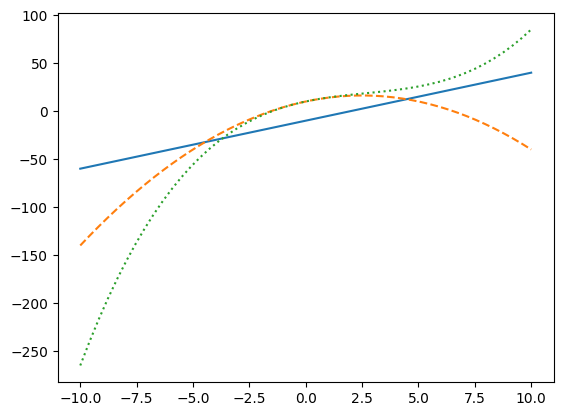

In [32]:
plt.figure()
plt.plot(xx1, yy_linear)
plt.plot(xx1, yy_parabola, ls="--")
plt.plot(xx1, yy_terceiro_grau, ls=":")

### Estilos de marcador 

Podemos especificar os marcadores com `marker=`, fornecendo uma string com o especificador. Os mais comuns são:

* `'s'` para um quadrado (*square*)
* `'o'` para um círculo
* `'*'` para uma estrela
* `'v'` `'>'` `'<'^` `'^'` para triângulos
* `'p'` para um pentágono

### Legendas

Se quiser especificar um nome a uma linha, utilize `label=` em `plt.plot` e depois chame a função `plt.legend()` para criar a caixa da legenda na figura.

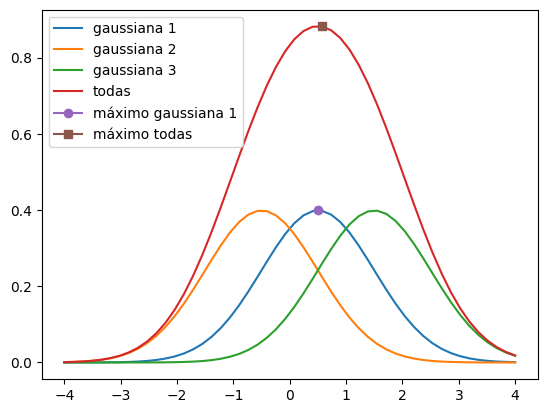

In [33]:
plt.figure()
plt.plot(xx3, yy_gauss_1, label="gaussiana 1")
plt.plot(xx3, yy_gauss_2, label="gaussiana 2")
plt.plot(xx3, yy_gauss_3, label="gaussiana 3")
plt.plot(xx3, yy_gauss_todos, label="todas")
plt.plot(mu, yy_gauss_1_max, marker="o", label="máximo gaussiana 1")
plt.plot(xx_gauss_todos_max, yy_gauss_todos_max, marker="s", label="máximo todas")
plt.legend()

Note que, na legenda, `máximo gaussiana 1` possui um marcador com uma linha como seu símbolo. Isso é porque não especificamos que a linha deveria ter tamanho 0 (efetivamente removendo-a). Note também que os máximos aparentam estar um pouquinho deslocado, e isso se deve à limitação da precisão dos pontos na curva, cuja rugosidade pode ser notada, especialmente no topo. Além disso, resista a tentação de chamar `plt.scatter` para criar esse tipo de notação (curvas sem linhas) porque o propósito dessa função é ligeiramente diferente.

Podemos especificar a cor tanto da linha quanto do marcador com `color=` ou `c=`, e o valor sendo um [nome](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py), uma cor do ciclo (começando com `'C0'`), uma string com o código hexadecimal da cor (`#XXXXXX`) ou uma cor de 1 letra (`'b'` para azul, `'g'` para verde, etc). Se quiser especificar a cor dos marcadores, utilize `markerfacecolor=` ou `mfc=` para mudar a cor do centro e `markeredgecolor` ou `mec=` para mudar a cor da borda. A espessura da linha e do contorno do marcador são especificadas com `linewidth=` ou `lw=` e `markeredgewidth=` ou `mew=`. O tamanho do marcador é especificado com `markersize=` ou `ms=`.

### Nomeação de eixos e título de figura

Para nomear os eixos, você pode utilizar `plt.xlabel` e `plt.ylabel`. O título de uma figura é modificado com `plt.title`. Em todas as partes que envolvem texto, você pode utilizar notação $\LaTeX$ para expandir as capacidades tipográficas e colocar equações, envolvendo os comandos em `$`. Não se esqueça de utilizar uma *raw string* para evitar problemas com caracteres de escape e comandos de $\LaTeX$.

### Escalas

Se quiser mudar a escala de um eixo, utilize `plt.xscale` ou `plt.yscale`, junto com `'linear'` para escala linear e `'log'` para escala logaritmica, e outras.

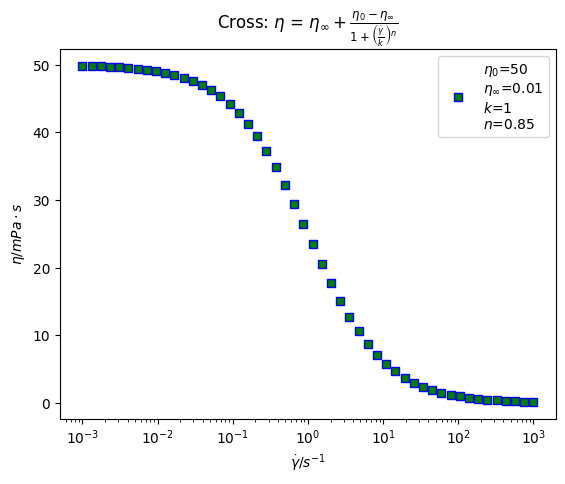

In [34]:
plt.figure()
plt.plot(
    xx4,
    yy_cross,
    lw=0,
    marker="s",
    mec="b",
    mfc="g",
    label="\n".join([r"$\eta_0$=50", r"$\eta_\infty$=0.01", r"$k$=1", r"$n$=0.85"]),
)
plt.xlabel(r"$\dot{\gamma} / s^{-1}$")
plt.ylabel(r"$\eta / mPa\cdot s$")
plt.xscale("log")
plt.title(r"Cross: $\eta$ = $\eta_\infty + \frac{\eta_0 - \eta_\infty}{1 + \left( \frac{\dot{\gamma}}{k} \right)^n }$")
plt.legend()

### Posição de *ticks*

Podemos especificar a posição e o texto dos *ticks* dos eixos x e y com `plt.xticks` e `plt.yticks`. Se utilizar o argumento `minor=True` para `plt.xticks` ou `plt.yticks`, você especificará se o comando se refere aos *ticks* principais (*major*) ou aos secundários (*minor*), e você pode tranquilamente utilizar o comando para especificar cada um. 

Você também pode utilizar `plt.grid` para adicionar linhas que saem dos *ticks*, e `which=` possui um papel similar ao argumento `minor=`, mas aqui precisamos especificar `which='minor'` para aplicar o *grid* aos *ticks* secundários.

Por padrão, um eixo tenta mostrar todo o conteúdo presente nele, mas a função tangente explode sob certos valores. Podemos limitar a área de visualização com `plt.xlim` e `plt.ylim`.

(-1.1, 1.1)

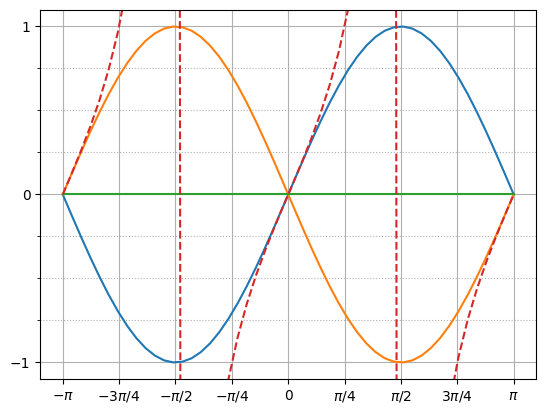

In [35]:
plt.figure()
plt.plot(xx2, yy_per1)
plt.plot(xx2, yy_per2)
plt.plot(xx2, yy_canc)
plt.plot(xx2, yy_tan, ls="--")


plt.xticks(
    ticks=np.arange(-np.pi, np.pi + 0.1, np.pi / 4),
    labels=[
        r"$-\pi$",
        r"$-3\pi/4$",
        r"$-\pi/2$",
        r"$-\pi/4$",
        r"0",
        r"$\pi/4$",
        r"$\pi/2$",
        r"$3\pi/4$",
        "$\pi$",
    ],
)
plt.yticks(ticks=np.arange(-1, 1.1, 1))
plt.yticks(ticks=np.arange(-0.75, 0.76, 0.25), minor=True)
plt.grid()
plt.grid(which="minor", ls=":")
plt.ylim(-1.1, 1.1)

Note que, na função tangente, quando ela transiciona de positivo para negativo, uma linha foi traçada em nosso gráfico. Esse é sempre o comportamento de `plt.plot`. Se quiser remover essas linhas, a maneira mais simples é utilizando vários comandos de plotagem sequenciais.

No código a seguir, as *arrays* iniciais são cortadas em várias arrays (`np.array_split`) com base nos índices (`np.where` com 1 argumento só) onde o valor absoluto (`np.abs`) é maior que 5. Esse valor foi escolhido a dedo e representa o ponto onde "explodiu para fora da área de interesse". Depois de separar as *arrays*, podemos fazer um loop por elas e plotar os resultados.

```python
yy_tan_split = np.array_split(yy_tan, np.where(np.abs(np.diff(yy_tan)) > 5)[0])
xx_tan_split = np.array_split(xx2, np.where(np.abs(np.diff(yy_tan)) > 5)[0])
for xx, yy in zip(xx_tan_split, yy_tan_split):
    if len(xx) == 1: continue
    plt.plot(xx, yy, ls='--', c='C3')
```

(sec:basicos_np_2)=
## Básicos de `numpy` Parte 2

### Submódulo `random`

Existem várias funções dentro do módulo random. Elas fornecem números aleatórios de determinadas distribuições estatísticas. Por exemplo, `.random` retorna um `float` entre 0 e 1 (último não incluso), de uma distribuição uniforme. Se você quiser testar algo com uma chance de, p.e., 20%, você pode chamar essa função e checar se o valor obtido for menor que 0.2. Similarmente, `.randint` retorna um número inteiro entre dois intervalos, distribuídos uniformemente.

Vamos visualizar essas funções construindo histogramas.

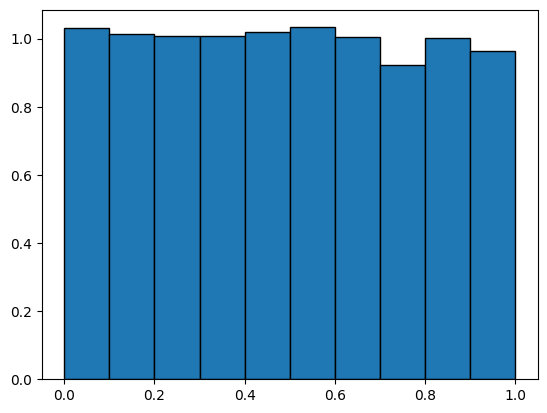

In [36]:
np.random.seed(42)
vals = np.random.random(size=10000)
_ = plt.hist(vals, density=True, edgecolor="k")

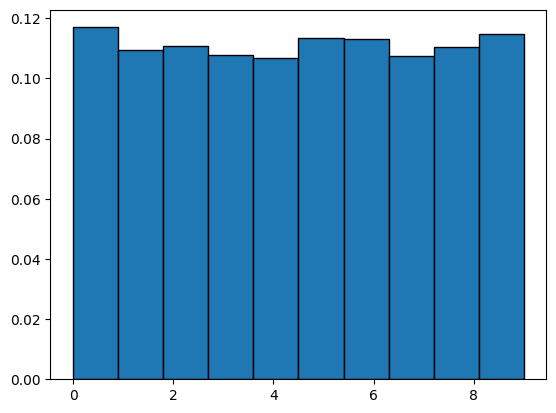

In [37]:
np.random.seed(42)
vals = np.random.randint(0, 10, size=10000)
_ = plt.hist(vals, density=True, edgecolor="k")

Podemos ver que em ambos os casos, os valores obtidos estão próximos à uniformidade. Eu também fixei o resultado ao forçar a semente do gerador de números pseudoaleatórios, e portanto os gráficos resultantes serão sempre iguais. Se você remover essa linha, verá que as curvas mudam a cada execução da célula, como é esperado.

Além de valores com distribuição uniforme, temos funções para distribuições estatísticas, como uma gaussiana, distribuição t de Student, chi-quadrado, e várias outras.

* `.randn` retorna valores de uma distribuição normal padrão (média zero, desvio padrão 1).

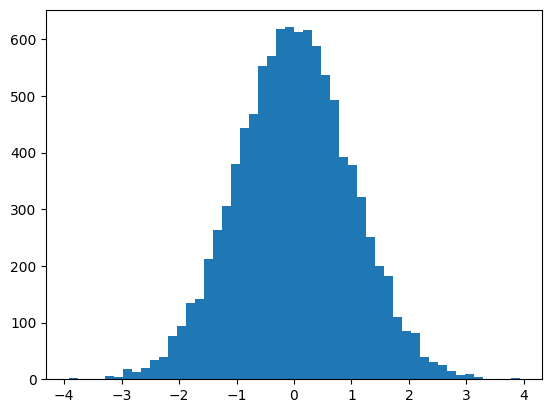

In [38]:
np.random.seed(42)
_ = plt.hist(np.random.randn(10000), bins=50)

* `.normal` é similar a `.randn`, mas é possível especificar a posição e largura da curva.

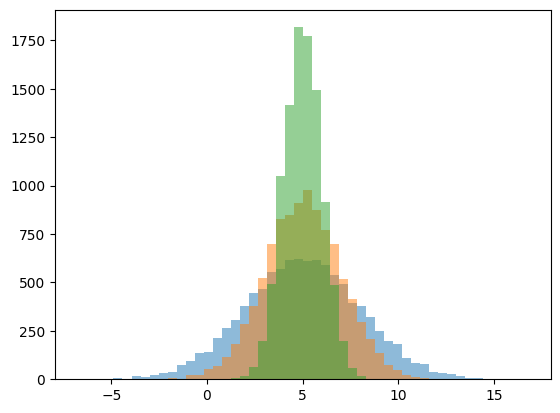

In [39]:
np.random.seed(42)
n, bins, containers = plt.hist(np.random.normal(loc=5, scale=3, size=10000), bins=50, alpha=0.5)
_ = plt.hist(np.random.normal(loc=5, scale=2, size=10000), bins=bins, alpha=0.5)
_ = plt.hist(np.random.normal(loc=5, scale=1, size=10000), bins=bins, alpha=0.5)

Aqui eu usei o fato da função `plt.hist` retornar os valores de cada coluna, as bordas de cada coluna e um container com os artistas de coluna para poder manter a mesma binagem de um histograma para o outro.

Aqui podemos ver como a distribuição t de Student difere com o aumento do número de graus de liberdade, e como ela se aproxima da distribuição normal quando o número de graus de liberdade aumenta. Neste caso, eu decidi utilizar a função `np.histogram` para calcular as contagens e bordas dos histogramas e plotar gráficos de linha, para facilitar a visualização. Note que quando temos *n* bins num histograma, sempre temos *n+1* bordas. Por essa razão, eu decidi plotar as contagens considerando que elas se referem ao valor central dessas bordas. Fiz isso com a média do valor da esquerda e da direita, de uma maneira compacta. Veja se você consegue entender porque isso funciona.

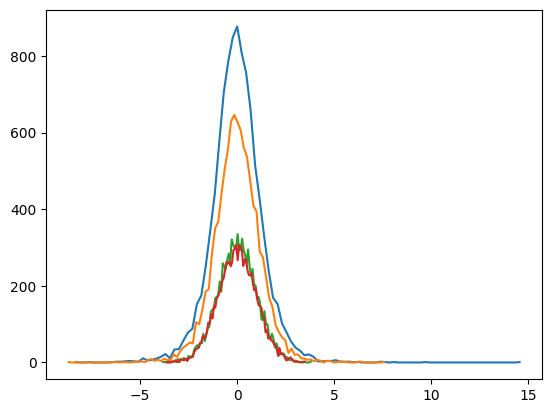

In [40]:
np.random.seed(42)
hist_df5, edges_df5 = np.histogram(np.random.standard_t(df=5, size=10000), bins=100)
hist_df15, edges_df15 = np.histogram(np.random.standard_t(df=7, size=10000), bins=100)
hist_df200, edges_df200 = np.histogram(np.random.standard_t(df=200, size=10000), bins=100)
hist_norm, edges_norm = np.histogram(np.random.standard_normal(size=10000), bins=100)

plt.plot((edges_df5[1:] + edges_df5[:-1]) / 2, hist_df5)
plt.plot((edges_df15[1:] + edges_df15[:-1]) / 2, hist_df15)
plt.plot((edges_df200[1:] + edges_df200[:-1]) / 2, hist_df200)
plt.plot((edges_norm[1:] + edges_norm[:-1]) / 2, hist_norm)

Existem mais funções estatísticas, com distribuições cumulativas, inversas, etc, no pacote `scipy.stats`, que será explorado depois.

Por fim temos a oportunidade de escolher elementos aleatoriamente de uma lista com `.choice`. Essa função aceita o número de elementos (`size`), e se eles serão amostrados com reposição ou não (`replace`). Note que se não puderem ser reamostrados, `size` não pode ser maior que o tamanho total da lista.

Aqui iremos criar uma amostra dos caracteres de caixa baixa, utilizando a biblioteca `string` como fonte da lista. Note que foi necessário converter `str` para uma lista para podermos usar essa função.

In [41]:
import string

np.random.seed(42)
print(np.random.choice(list(string.ascii_lowercase), size=10, replace=False))
np.random.seed(42)
print(np.random.choice(list(string.ascii_lowercase), size=10, replace=True))

['i' 'q' 'a' 'y' 'l' 'j' 'n' 'b' 'x' 'f']
['g' 't' 'o' 'k' 'h' 'u' 'g' 'z' 's' 'w']


Podemos também simular um [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) utilizando essa função. Esse método lhe permite calcular, por exemplo, regiões de confiança de estatísticas que não necessariamente seguem a distribuição normal ou similar a normal. Essa técnica depende em realizar uma amostragem, com reposição, muitas vezes e criar uma distribuição da estatística que você quiser calcular.

Primeiro iremos gerar uma população com uma média e desvio padrão conhecida, e depois iremos calcular esse valor médio por amostragem, e obter uma região de confiança, utilizando a função `np.percentile`.

Bootstrap média 10.06. Faixa de confiança 90%: [8.61, 11.44]


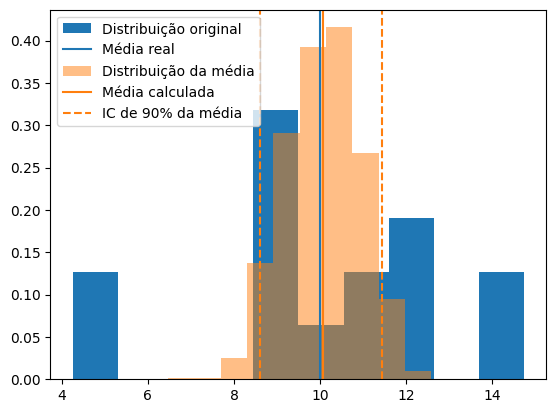

In [42]:
np.random.seed(42)
média = 10
desvpad = 3
amostra = np.random.normal(loc=média, scale=desvpad, size=15)
bootstraps = [np.mean(np.random.choice(amostra, size=10, replace=True)) for _ in range(1000)]
pct_5 = np.percentile(bootstraps, 5)
pct_95 = np.percentile(bootstraps, 95)
media = np.mean(bootstraps)
print(f"Bootstrap média {media:.2f}. Faixa de confiança 90%: [{pct_5:.2f}, {pct_95:.2f}]")

*_, cols_distrib = plt.hist(amostra, density=True)
l1 = plt.axvline(média, c="C0")
*_, cols_bootstrap = plt.hist(bootstraps, alpha=0.5, density=True)
l2 = plt.axvline(pct_5, c="C1", ls="--")
l3 = plt.axvline(pct_95, c="C1", ls="--")
l4 = plt.axvline(media, c="C1")

_ = plt.legend(
    [cols_distrib, l1, cols_bootstrap, l4, l2],
    ["Distribuição original", "Média real", "Distribuição da média", "Média calculada", "IC de 90% da média"],
)

Surpreendente como o valor estimado é próximo ao valor real, não é? Eu fiquei muito surpreso quando me deparei com essa técnica pela primeira vez. Dizem que essa é a maneira preferida de fazer estatística por "aqueles que não sabem estatística". Sinceramente, isso é muito mais simples de fazer e lembrar que decorar as fórmulas, p.e., de distribuição *t* e comparações de médias. 

### Máscaras, indexação avançada

Quando temos arrays contendo dados experimentais, pode ser útil tratar parte desses dados de formas diferentes. Podemos utilizar máscaras para trabalhar com partes diferentes de uma image. Uma máscara é um *array* com o mesmo formato de outro *array*, contendo somente booleanos.

Por exemplo, quando temos uma imagem em escala de cinza, podemos realizar uma segmentação dessa imagem pela intensidade dos pixels utilizando um valor de *threshold*. Para isso, criamos uma máscara e aplicamos essa máscara ao *array*, alterando-o. Aqui, irei utilizar uma gaussiana 2D para simular alguns objetos em um *array*, e depois segmentá-los com base na intensidade do pixel. Irei mostrar os resultados utilizando a função `plt.imshow` e `plt.contour`, que serve para mostrar *arrays* como se fossem imagens e linhas de contorno. 

Uma possível definição para a gaussiana 2D está a seguir. Iremos simplificá-la, presumindo que a matriz de covariância não possui termos fora da diagonal.

$$
y = A \cdot \exp{\left(-\left(
        \frac{\left(x - \mu_x\right)^2}{2 \sigma_x ^ 2} +
        \frac{\left(y - \mu_y\right)^2}{2 \sigma_y ^ 2}
    \right)\right)
}
$$

Essa gaussiana 2D aceita as coordenadas de `x` e `y` e calcula uma altura para este par de coordenadas. Se fornecessemos uma matriz com pares de coordenadas, teríamos tecnicamente uma matriz de 3 dimensões, como esta:

$$
\begin{pmatrix}
    \left( 0,0 \right) & \left( 1,0\right) & \left( 2,0\right) \\
    \left( 0,1\right) & \left( 1,1\right) & \left( 2,1\right) \\
    \left( 0,2\right) & \left( 1,2\right) & \left( 2,2\right) \\
\end{pmatrix}
$$

Quando utilizarmos essa função, teríamos que separar `x` e `y` ao calcular a gaussiana 2D. O exemplo a seguir faz justamente isso.

In [43]:
def gauss_2d_v1(arr, A, centro_xy, sigma_xy):
    return A * np.exp(
        -(
            ((arr[:, :, 0] - centro_xy[0]) ** 2 / (2 * sigma_xy[0] ** 2))
            + ((arr[:, :, 1] - centro_xy[1]) ** 2 / (2 * sigma_xy[1] ** 2))
        )
    )

Porém, podemos fornecer duas matrizes 2D, cada uma contendo um "plano" da matriz original ou, em outras palavras, uma matriz contendo somente as coordenadas de `x`, que chamaremos de `xx` e outra só com as coordenadas de `y`, que chamaremos de `yy`.

$$
xx = 
\begin{pmatrix}
     0 &  1 &  2 \\
     0 &  1 &  2 \\
     0 &  1 &  2 \\
\end{pmatrix}
$$

e

$$
yy = 
\begin{pmatrix}
     0 & 0 &  0 \\
     1 &  1 &  1 \\
     2 &  2 &  2 \\
\end{pmatrix}
$$



In [44]:
def gauss_2d_v2(xx, yy, A, centro_xy, sigma_xy):
    return A * np.exp(
        -(((xx - centro_xy[0]) ** 2 / (2 * sigma_xy[0] ** 2)) + ((yy - centro_xy[1]) ** 2 / (2 * sigma_xy[1] ** 2)))
    )

Note que `xx` e `yy` possuem bastante informação redundante. Em `xx`, todas as colunas são iguais e em `yy`, todas as linhas são iguais. Poderíamos especificar `xx` e `yy` como um vetor que se repete algumas vezes, chamados `x` e `y`. Felizmente, a função `np.meshgrid` nos ajuda a fazer isso. Veja os seguinte exemplo:


In [45]:
x = np.arange(3)
y = np.arange(3)
xx, yy = np.meshgrid(x, y)
print(xx, "\n\n", yy)

[[0 1 2]
 [0 1 2]
 [0 1 2]] 

 [[0 0 0]
 [1 1 1]
 [2 2 2]]


Aqui conseguimos definir `xx` e `yy` partindo de algo bem simples. Se quisermos chegar à matriz que mencionamos inicialmente, podemos utilizar `np.dstack`, que empilha dois `arrays` na terceira dimensão.

In [46]:
xxyy = np.dstack((xx, yy))
print(xxyy)
print()
print(xxyy[:, :, 0], "\n\n", xxyy[:, :, 1])

[[[0 0]
  [1 0]
  [2 0]]

 [[0 1]
  [1 1]
  [2 1]]

 [[0 2]
  [1 2]
  [2 2]]]

[[0 1 2]
 [0 1 2]
 [0 1 2]] 

 [[0 0 0]
 [1 1 1]
 [2 2 2]]


Eu pessoalmente acho meio confusa a notação para mostrar a matriz 3D, mas veja que ela obedece os pares de números definidos acima, linha a linha.

Munidos agora desse conhecimento, vamos primeiramente criar uma matriz `z`, que contém duas gaussianas, a partir das matrizes `xx` e `yy` que tem valores que vão de 0 a 5.

In [47]:
x = np.linspace(0, 5, num=500)
y = np.linspace(0, 5, num=500)
xx, yy = np.meshgrid(x, y)
z = gauss_2d_simplif(xx, yy, 1, (1, 1), (0.5, 0.5)) + gauss_2d_simplif(xx, yy, 1, (3, 3), (0.5, 0.5))

NameError: name 'gauss_2d_simplif' is not defined

Devemos ter essas gaussianas, uma com centro de (1, 1) e outra com centro em (3, 3). Vamos ver o resultado.

In [ ]:
plt.figure(figsize=(4, 4))
plt.contour(xx, yy, z)

De fato conseguimos ver isso bem claramente nesta imagem. Se quisermos observar essa matriz como se fosse uma fotografia, podemos utilizar `plt.imshow`. Note, porém, que a origem do sistema de coordenada de matrizes e imagens geralmente é diferente. Matrizes iniciam no canto superior esquerdo e imagens no canto inferior esquerdo. Por essa razão, precisamos passar o *kwarg* `origin='lower'` para `plt.imshow`.

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(z, origin="lower", cmap="gray")

Os eixos, desta vez, se referem ao número de pontos. Como criamos `x` e `y` com 500 pontos cada, os eixos acabam indo de 0 a 500. Também passei o mapa de cor `cmap` de escala de cinza, `gray`. Podemos inclusive combinar ambas essas imagens. Dessa vez, vamos utilizar a primeira função que definimos.

In [ ]:
x = np.linspace(0, 5, num=500)
y = np.linspace(0, 5, num=500)
xx, yy = np.meshgrid(x, y)
xxyy = np.dstack((xx, yy))
z = gauss_2d_v1(xxyy, 1, (1, 1), (0.5, 0.5)) + gauss_2d_v1(xxyy, 1, (3, 3), (0.5, 0.5))

plt.figure(figsize=(4, 4))
plt.contour(z, origin="lower")
plt.imshow(z, origin="lower", cmap="gray")
plt.xticks([])
plt.yticks([])

Aqui, eu tirei os `ticks`, porque não carregam muita informação relevante.

Tendo isso, vamos criar uma imagem simulando um agrupamento de nanopartículas visualizadas por alguma técnica de microscopia. Para isso, vamos aleatorizar a posição delas e depois adicionar um ruído aleatório. Tal ruído será restringido somente a valores positivos com a função `np.clip`. Por último, irei reescalar essa imagem para se aproximar ao que é tipicamente utilizado no processamento de imagens, que é uma imagem de números entre 0 e 255 (8 bits).

In [ ]:
np.random.seed(0)
num_particulas = 10
num_pontos = 500
min_vals = 0
max_vals = 5
raio = 0.15
x = np.linspace(min_vals, max_vals, num=num_pontos)
y = np.linspace(min_vals, max_vals, num=num_pontos)
xx, yy = np.meshgrid(x, y)
z = np.zeros_like(xx)

for _ in range(num_particulas):
    part = gauss_2d_v2(xx, yy, 1, (np.random.random() * max_vals, np.random.random() * max_vals), (0.15, 0.15))
    z += part

z += np.clip(np.random.normal(0, 0.15, size=z.shape), 0, np.inf)

z = (z / z.max() * 200).astype(np.uint8)

plt.imshow(z)
plt.xticks([])
plt.yticks([])

Você pode ver que não existe um limite muito bem definido entre partícula e fundo. Separá-los é complicado. Esse é um problema bastante grande na área de processamento de imagens, mas aqui iremos fazer isso de maneira bastante simplificada. Primeiro, vamos ter uma ideia da concentração de valores de pixel para podermos decidir melhor sobre um valor de limite (*threshold*). Para isso, basta calcularmos um histograma da imagem.

In [ ]:
_ = plt.hist(z.ravel(), bins=256, density=True)

Vamos ver o que ocorre se seccionarmos com o valor de 75. Para isso, criamos a máscara.

In [ ]:
mascara = z > 75

plt.imshow(mascara)

Podemos remover os pontos pequenos se fizermos uma operação de erosão. Para isso, vamos passar uma matriz 

In [ ]:
import scipy.ndimage

In [ ]:
mascara_limpa = scipy.ndimage.binary_opening(mascara, iterations=3)
plt.imshow(mascara_limpa)

In [ ]:
labels, num_particulas = scipy.ndimage.label(mascara_limpa)
plt.imshow(labels)
print(num_particulas)
print(
    "Áreas:", list(mascara_limpa[*obj].sum() for obj in scipy.ndimage.find_objects(labels))
)  # TODO: descrever esta etapa melhor

### Mudança de ordem

* flip
* flipud
* fliplr
* Python reversed
* sort
* argsort


### Seccionamento

* where
* partition

### Álgebra linear

TODO: revisar fórmulas
$$
y = bX
$$

$$
b = (X^TX)^{-1}X^Ty
$$

In [ ]:
x = np.linspace(0, 10)
y_real = 2 * x + 1
y_ruido = np.random.normal(scale=1, size=y_real.size) + y_real

X = np.column_stack([np.ones_like(y_ruido), x])
b = np.linalg.inv(X.T @ X) @ X.T @ y_ruido

plt.plot(x, y_real, label="y real")
plt.plot(x, y_ruido, label='y "medido"')
plt.plot(x, X @ b, label="ajuste", ls="--")
plt.legend()

### Exportação

* save

In [ ]:
np.lookfor("singular value decomposition")

Para criar uma legenda com marcadores específicos, você pode fornecer uma lista de *handles* e outra de *labels*. Os *handles* podem vir de comandos de plotagem, ou da criação de artistas diretamente, não relacionados diretamente com a figura em si.

In [ ]:
x = np.linspace(0, 100, num=1000)
y1 = np.exp(-x / 15)
y2 = np.sin(x)
y = y1 * y2

fig, ax = plt.subplots()

l_total = ax.plot(x, y)
l_exp = ax.plot(x, y1, ls=":", lw=1)
l_seno = ax.plot(x, y2, ls=":", lw=1)
scatter = ax.scatter(
    [x[np.argmax(y)], x[np.argmin(y)], x[78]],
    [np.max(y), np.min(y), y[78]],
    c=["C1", "C2", "C3"],
    zorder=2,
)

# Criação de artistas Line2D, que precisam de uma lista de X e Y, mas que
# não afetará em nada o resultado.
from matplotlib.lines import Line2D

l1 = Line2D([0], [0], marker="o", c="C1", lw=0)
l2 = Line2D([0], [0], marker="o", c="C2", lw=0)
l3 = Line2D([0], [0], marker="o", c="C3", lw=0)

ax.legend(
    [l_total[0], l_exp[0], l_seno[0], l1, l2, l3],
    [
        "Seno amortecido",
        "Amortecimento",
        "Seno",
        "Primeiro máximo",
        "Primeiro mínimo",
        "Segundo máximo",
    ],
)